<a href="https://colab.research.google.com/github/panghanwu/tibame_project/blob/main/data_view.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install googletrans

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
import googletrans
import zipfile
import glob
import random

translator = googletrans.Translator()

def eng2cht(english):
  return translator.translate(english, dest='zh-tw').text

In [23]:
# unzip image set
with zipfile.ZipFile('drive/My Drive/Datasets/DeepFashion/img.zip', 'r') as zip_f:
  zip_f.extractall('drive/My Drive/Datasets/DeepFashion/')

In [5]:
"""Test zone"""

translator.translate('bomber', dest='zh-tw').text

'轟炸機'

In [35]:
# path
glob.glob('drive/My Drive/Datasets/DeepFashion/Anno_coarse/*')

['drive/My Drive/Datasets/DeepFashion/Anno_coarse/list_bbox.txt',
 'drive/My Drive/Datasets/DeepFashion/Anno_coarse/list_category_img.txt',
 'drive/My Drive/Datasets/DeepFashion/Anno_coarse/list_attr_img.txt',
 'drive/My Drive/Datasets/DeepFashion/Anno_coarse/list_category_cloth.txt',
 'drive/My Drive/Datasets/DeepFashion/Anno_coarse/list_attr_cloth.txt',
 'drive/My Drive/Datasets/DeepFashion/Anno_coarse/list_landmarks.txt']

In [24]:
"""Dataset size"""

img_dir = glob.glob('drive/My Drive/Datasets/DeepFashion/img/*')
img_number = 0

for d in img_dir:
  file_list = glob.glob(d + '/*')
  img_number += len(file_list)

print('Total number of image')
print(img_number)

Total number of image
289229


In [25]:
"""Label list"""
# category list
cate_list = pd.read_csv('drive/My Drive/Datasets/DeepFashion/Anno_coarse/list_category_cloth.txt', sep='\s+', header=1)

cate_cht = cate_list['category_name'].apply(eng2cht)

cate_list = pd.DataFrame({'category_type': cate_list['category_type'], 
              'category_name': cate_list['category_name'], 
              'category_cht': cate_cht})

cate_list.to_csv('label_list_cate.csv', index=False)
cate_list

,category_type,category_name,category_cht
0,1,Anorak,阿諾拉克
1,1,Blazer,西裝外套
2,1,Blouse,襯衫
3,1,Bomber,轟炸機
4,1,Button-Down,按下按鈕
5,1,Cardigan,開襟衫
6,1,Flannel,絨布
7,1,Halter,吊帶衫
8,1,Henley,亨利
9,1,Hoodie,連帽衫


In [26]:
attri_list = pd.read_csv('drive/My Drive/Datasets/DeepFashion/Anno_coarse/list_attr_cloth.txt', sep='\s\s+', header=1)

attri_cht = attri_list['attribute_name'].apply(eng2cht)

attri_list = pd.DataFrame({'attribute_type': attri_list['attribute_type'], 
              'attribute_name': attri_list['attribute_name'], 
              'attribute_cht': attri_cht})

attri_list.to_csv('label_list_attri.csv')
attri_list

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,attribute_type,attribute_name,attribute_cht
0,3,a-line,線
1,1,abstract,抽象
2,1,abstract chevron,人字形
3,1,abstract chevron print,人字形抽像印花
4,1,abstract diamond,抽象鑽石
...,...,...,...
995,4,zip-pocket,拉鍊口袋
996,4,zip-up,拉鍊拉上
997,4,zipped,zipped
998,4,zipper,拉鍊


In [27]:
"""Bounding box"""

bbox_list = pd.read_csv('drive/My Drive/Datasets/DeepFashion/Anno_coarse/list_bbox.txt', sep='\s+', header=1)
bbox_list

,image_name,x_1,y_1,x_2,y_2
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,72,79,232,273
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,67,59,155,161
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,65,65,156,200
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,51,62,167,182
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,46,88,166,262
...,...,...,...,...,...
289217,img/Paisley_Print_Babydoll_Dress/img_00000050.jpg,1,1,300,300
289218,img/Paisley_Print_Babydoll_Dress/img_00000051.jpg,14,58,225,277
289219,img/Paisley_Print_Babydoll_Dress/img_00000052.jpg,18,41,149,230
289220,img/Paisley_Print_Babydoll_Dress/img_00000053.jpg,75,47,220,300


In [38]:
# image category
img_cate_list = pd.read_csv('drive/My Drive/Datasets/DeepFashion/Anno_coarse/list_category_img.txt', sep='\s+', header=1)
img_cate_list

,image_name,category_label
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,3
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,3
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,3
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,3
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,3
...,...,...
289217,img/Paisley_Print_Babydoll_Dress/img_00000050.jpg,41
289218,img/Paisley_Print_Babydoll_Dress/img_00000051.jpg,41
289219,img/Paisley_Print_Babydoll_Dress/img_00000052.jpg,41
289220,img/Paisley_Print_Babydoll_Dress/img_00000053.jpg,41


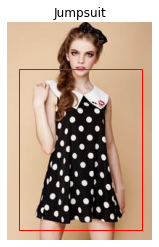

In [70]:
# show image with bounding box
fig, ax = plt.subplots()

rdx = random.randint(0,289221)

img = Image.open('drive/My Drive/Datasets/DeepFashion/' + bbox_list['image_name'][rdx])
ax.imshow(img)

x_1 = bbox_list['x_2'][rdx]
y_1 = bbox_list['y_1'][rdx]
w = bbox_list['x_1'][rdx] - x_1
h = bbox_list['y_2'][rdx] - y_1

rect = patches.Rectangle((x_1, y_1), w, h, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

cate_code = img_cate_list['category_label'][rdx]
ax.set_title(cate_list['category_name'][cate_code])
ax.axis(False)

plt.show()

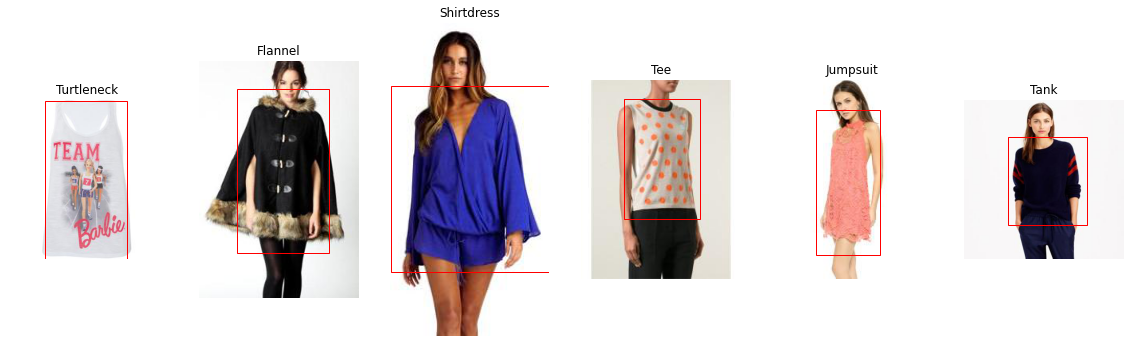

In [80]:
fig, ax = plt.subplots(1, 6, figsize=(20,6))

for i in range(6):
  rdx = random.randint(0,289221)

  img = Image.open('drive/My Drive/Datasets/DeepFashion/' + bbox_list['image_name'][rdx])
  ax[i].imshow(img)

  x_1 = bbox_list['x_2'][rdx]
  y_1 = bbox_list['y_1'][rdx]
  w = bbox_list['x_1'][rdx] - x_1
  h = bbox_list['y_2'][rdx] - y_1

  rect = patches.Rectangle((x_1, y_1), w, h, linewidth=1, edgecolor='r', facecolor='none')
  ax[i].add_patch(rect)

  cate_code = img_cate_list['category_label'][rdx]
  ax[i].set_title(cate_list['category_name'][cate_code])
  ax[i].axis(False)

plt.show()